In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [3]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-05\data2\lev_05_mp.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Item_Code', String),
        ('OutOfHome_Consumption_Quantity', Float64),
        ('OutOfHome_Consumption_Value', Float64),
        ('Total_Consumption_Quantity', Float64),
        ('Total_Consumption_Value', Float64),
        ('Source', String),
        ('Multiplier', Int64)])

In [4]:
cols = [
    'State',
    'Item_Code',
    'Total_Consumption_Quantity',
    'Total_Consumption_Value',
]

pdf = pdf [cols]


In [5]:

pdf = pdf.filter(
    pl.col('State') == '23'
)

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

'Desire Filter shape (1355664, 4)'

In [6]:
print(f"Number of unique Item code present {pdf['Item_Code'].n_unique()}")

Number of unique Item code present 141


In [7]:
pdf.estimated_size(unit='mb')

10.66225814819336

In [8]:
cols = [
    'Item_Code',
    'Total_Consumption_Quantity',
    'Total_Consumption_Value',
]

pdf = pdf[cols]

In [9]:
df = pdf.to_pandas()

In [10]:
df['Item_Code']

0            4
1           61
2           62
3          103
4          105
          ... 
1355659    219
1355660    239
1355661    249
1355662    269
1355663    279
Name: Item_Code, Length: 1355664, dtype: int16

In [11]:
df

,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value
0,4,0.0,200.0
1,61,15.0,NaN
2,62,14.0,NaN
3,103,1.0,75.0
4,105,0.0,15.0
...,...,...,...
1355659,219,NaN,237.0
1355660,239,NaN,60.0
1355661,249,0.0,14.0
1355662,269,415.0,129.0


In [12]:
df.isnull().sum()

Item_Code                          0
Total_Consumption_Quantity    146144
Total_Consumption_Value        36200
dtype: int64

In [14]:
import pandas as pd

# Your mapping table (from the text)
mapping = {
    129: "cereals",
    139: "cereal substitute",
    159: "pulses & products",
    179: "salt & sugar",
    169: "milk & milk products",
    219: "vegetables",
    239: "fruits (fresh)",
    249: "fruits (dry)",
    199: "egg, fish & meat",
    189: "edible oil",
    269: "spices",
    279: "beverages",
    289: "served processed food",
    299: "packaged processed food"
}

# Add a new column for labels
df['Category'] = df['Item_Code'].map(mapping)

df


,Item_Code,Total_Consumption_Quantity,Total_Consumption_Value,Category
0,4,0.0,200.0,NaN
1,61,15.0,NaN,NaN
2,62,14.0,NaN,NaN
3,103,1.0,75.0,NaN
4,105,0.0,15.0,NaN
...,...,...,...,...
1355659,219,NaN,237.0,vegetables
1355660,239,NaN,60.0,fruits (fresh)
1355661,249,0.0,14.0,fruits (dry)
1355662,269,415.0,129.0,spices


In [22]:
df['Category'].value_counts()

Category
beverages               28052
salt & sugar            28004
pulses & products       27944
vegetables              27934
edible oil              27932
spices                  27926
cereals                 27890
milk & milk products    27648
fruits (fresh)          27234
fruits (dry)            23794
egg, fish & meat        14530
cereal substitute        6064
Name: count, dtype: int64

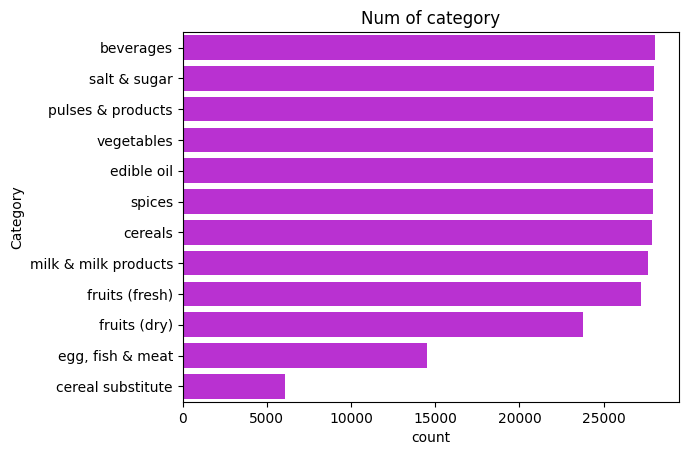

In [21]:
sns.barplot(df['Category'].value_counts(), orient='h')
plt.title('Num of category')
plt.show()

# Category

In [28]:
category_df = df.groupby(df['Category'])[[ 'Total_Consumption_Quantity', 'Total_Consumption_Value',]].count()
category_df

,Total_Consumption_Quantity,Total_Consumption_Value
Category,,
beverages,0,28052
cereal substitute,6064,6064
cereals,27890,27838
edible oil,27932,27932
"egg, fish & meat",0,14530
fruits (dry),23794,23794
fruits (fresh),0,27234
milk & milk products,0,27648
pulses & products,27944,27944


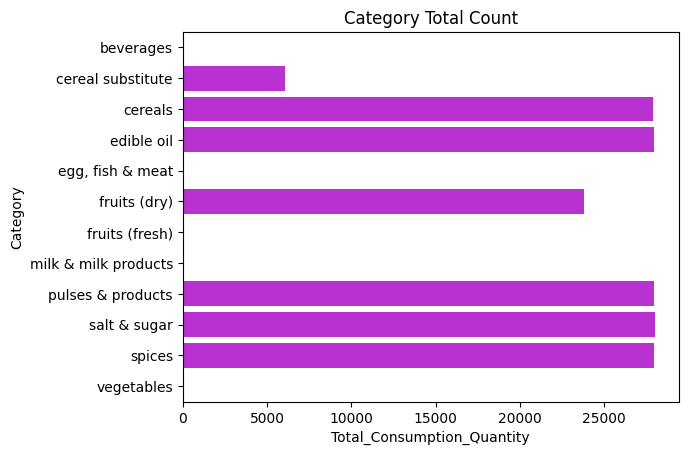

In [30]:
sns.barplot(category_df['Total_Consumption_Quantity'], orient='h')
plt.title('Category Total Count')
plt.show()

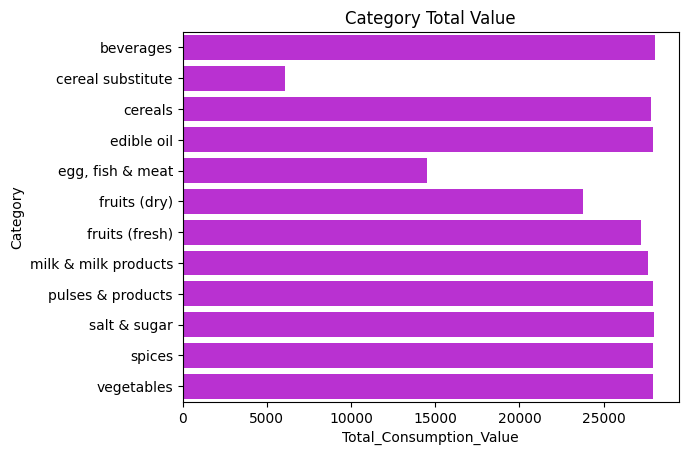

In [32]:
sns.barplot(category_df['Total_Consumption_Value'], orient='h')
plt.title('Category Total Value')
plt.show()

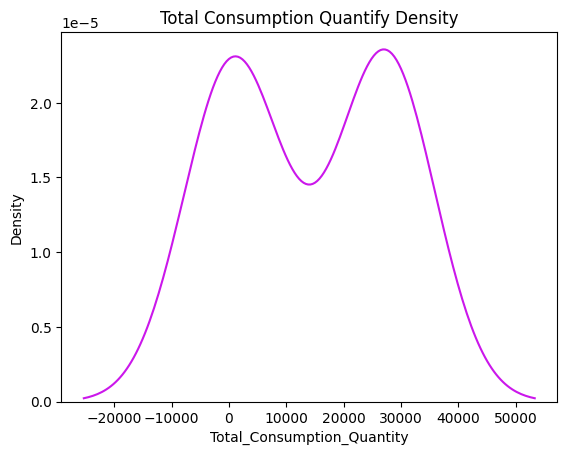

In [ ]:
sns.kdeplot(category_df['Total_Consumption_Quantity'])
plt.title('Total Consumption Quantity Density')
plt.show()

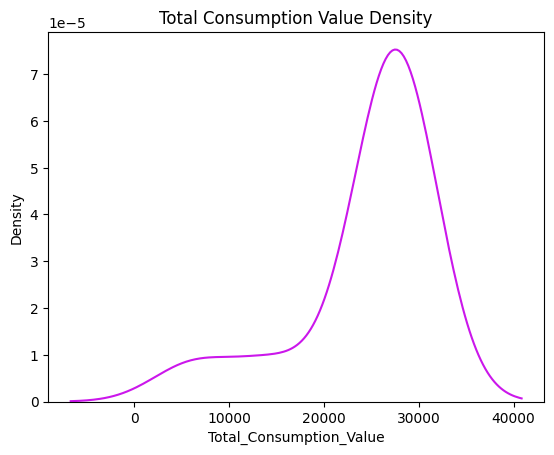

In [37]:
sns.kdeplot(category_df['Total_Consumption_Value'])
plt.title('Total Consumption Value Density')
plt.show()

In [23]:
df.columns

Index(['Item_Code', 'Total_Consumption_Quantity', 'Total_Consumption_Value',
       'Category'],
      dtype='object')